# **Convolutional Neural Network using Cifar10 dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
#(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()
(X_trains,y_train), (X_test,y_test)= load_data()

In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
y_train[0][0]

6

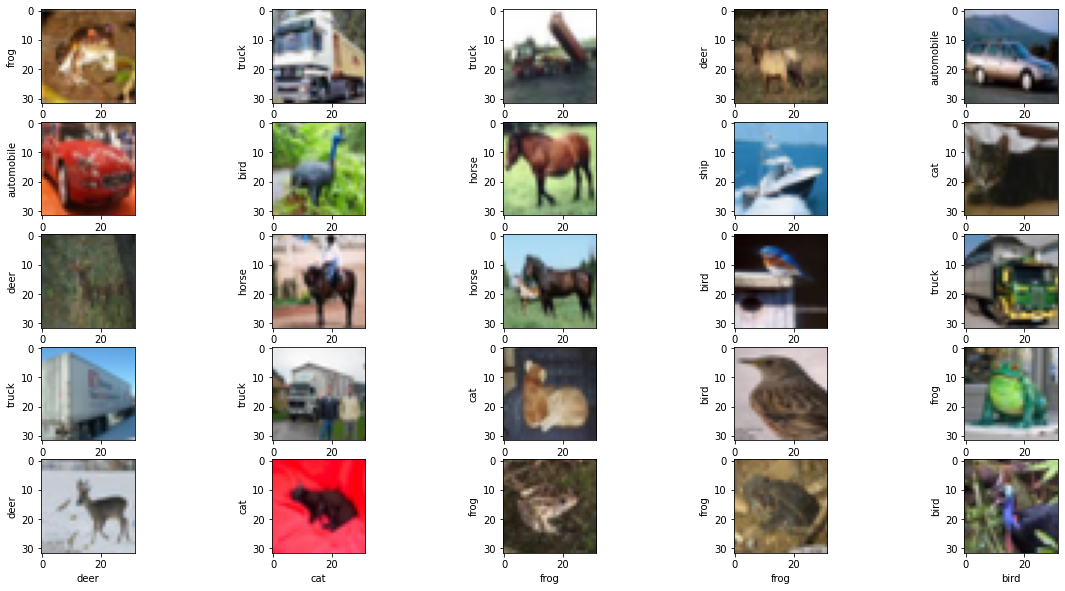

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_trains[i])
  plt.xlabel(class_names[y_train[i][0]])
  plt.ylabel(class_names[y_train[i][0]])
plt.show()
plt.tight_layout();

In [8]:
X_trains.shape

(50000, 32, 32, 3)

In [10]:
input_shape=X_trains.shape[1:]
input_shape

(32, 32, 3)

In [11]:
from numpy import unique
n_classes= len(unique(y_train))
n_classes

10

In [12]:
#train_images,test_images= train_images/255, test_images/255
X_train= X_trains.astype('float32')/255.0
X_train[0:1]

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [13]:
X_test= X_test.astype('float32')/255.0

Epoch 1/100
391/391 [==============================] - 60s 150ms/step - loss: 1.6345 - accuracy: 0.4053
Epoch 2/100
391/391 [==============================] - 57s 146ms/step - loss: 1.3022 - accuracy: 0.5387
Epoch 3/100
391/391 [==============================] - 57s 147ms/step - loss: 1.1606 - accuracy: 0.5887
Epoch 4/100
391/391 [==============================] - 56s 144ms/step - loss: 1.0763 - accuracy: 0.6198
Epoch 5/100
391/391 [==============================] - 58s 148ms/step - loss: 1.0028 - accuracy: 0.6524
Epoch 6/100
391/391 [==============================] - 56s 144ms/step - loss: 0.9449 - accuracy: 0.6674
Epoch 7/100
391/391 [==============================] - 56s 143ms/step - loss: 0.8953 - accuracy: 0.6856
Epoch 8/100
391/391 [==============================] - 56s 143ms/step - loss: 0.8572 - accuracy: 0.6987
Epoch 9/100
391/391 [==============================] - 56s 142ms/step - loss: 0.8199 - accuracy: 0.7122
Epoch 10/100
391/391 [==============================] - 60s 152m

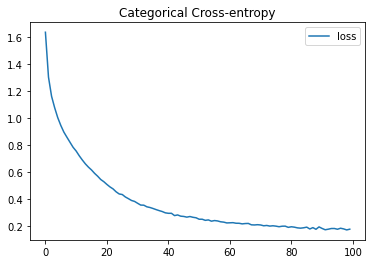

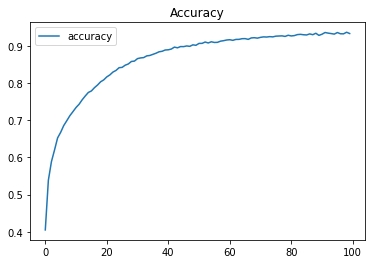

In [14]:
# Apply Convolution and ReLU
# Apply filter (Number of filters = 32, Kernel size = (3,3)) with Convolution to filter an image for a particular feature
# Detect that feature within the filtered image using ReLU
#model=models.Sequential()
model=Sequential()
#model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape))

# Apply MaxPool (Condense the image to enhance the features using maximum pooling with pool size = (2,2)))
# model.add(layers.MaxPooling2D(2,2))
model.add(MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Apply Flatten to transform matrix to vector form
#model.add(layers.Flatten())
model.add(Flatten())

# Define model
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(n_classes,activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=100, batch_size=128,verbose=1)

# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Categorical Cross-entropy")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")
print('Accuracy of model is : %.3f' %acc)
model.summary()

1/1 [==============================] - 0s 100ms/step
Predicted = 1


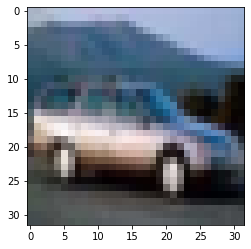

In [15]:
# Predict Model
image=X_train[4]
from numpy import argmax
ypred= model.predict(np.asarray([image]))
print('Predicted = %d' %argmax(ypred))
plt.imshow(X_trains[4])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               2